In [2]:
import numpy as np
import cv2 as cv
import glob
# termination criteria

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 35, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)

objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob('/home/aquirah/Documents/infra2'+'/*.png')



In [3]:
for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (9,6), None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)
        # Draw and display the corners
        cv.drawChessboardCorners(img, (9,6), corners2, ret)
        cv.imshow('img', img)
        cv.waitKey(500)
cv.destroyAllWindows()

QObject::moveToThread: Current thread (0x5562f7823040) is not the object's thread (0x5562f8088420).
Cannot move to target thread (0x5562f7823040)

QObject::moveToThread: Current thread (0x5562f7823040) is not the object's thread (0x5562f8088420).
Cannot move to target thread (0x5562f7823040)

QObject::moveToThread: Current thread (0x5562f7823040) is not the object's thread (0x5562f8088420).
Cannot move to target thread (0x5562f7823040)

QObject::moveToThread: Current thread (0x5562f7823040) is not the object's thread (0x5562f8088420).
Cannot move to target thread (0x5562f7823040)

QObject::moveToThread: Current thread (0x5562f7823040) is not the object's thread (0x5562f8088420).
Cannot move to target thread (0x5562f7823040)

QObject::moveToThread: Current thread (0x5562f7823040) is not the object's thread (0x5562f8088420).
Cannot move to target thread (0x5562f7823040)

QObject::moveToThread: Current thread (0x5562f7823040) is not the object's thread (0x5562f8088420).
Cannot move to tar

In [4]:
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)


In [5]:
mtx

array([[385.61402899,   0.        , 321.26571055],
       [  0.        , 385.76973781, 239.59690959],
       [  0.        ,   0.        ,   1.        ]])

In [6]:
img = cv.imread(images[0])
h,  w = img.shape[:2]
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

In [7]:
newcameramtx

array([[372.4147644 ,   0.        , 320.36027687],
       [  0.        , 372.38607788, 238.87867582],
       [  0.        ,   0.        ,   1.        ]])

In [8]:
dst = cv.undistort(img, mtx, dist, None, newcameramtx)


In [9]:

cv.imshow("Original",img)
cv.waitKey(0)
cv.destroyAllWindows()

QObject::moveToThread: Current thread (0x5562f7823040) is not the object's thread (0x5562f8088420).
Cannot move to target thread (0x5562f7823040)

QObject::moveToThread: Current thread (0x5562f7823040) is not the object's thread (0x5562f8088420).
Cannot move to target thread (0x5562f7823040)

QObject::moveToThread: Current thread (0x5562f7823040) is not the object's thread (0x5562f8088420).
Cannot move to target thread (0x5562f7823040)

QObject::moveToThread: Current thread (0x5562f7823040) is not the object's thread (0x5562f8088420).
Cannot move to target thread (0x5562f7823040)

QObject::moveToThread: Current thread (0x5562f7823040) is not the object's thread (0x5562f8088420).
Cannot move to target thread (0x5562f7823040)

QObject::moveToThread: Current thread (0x5562f7823040) is not the object's thread (0x5562f8088420).
Cannot move to target thread (0x5562f7823040)

QObject::moveToThread: Current thread (0x5562f7823040) is not the object's thread (0x5562f8088420).
Cannot move to tar

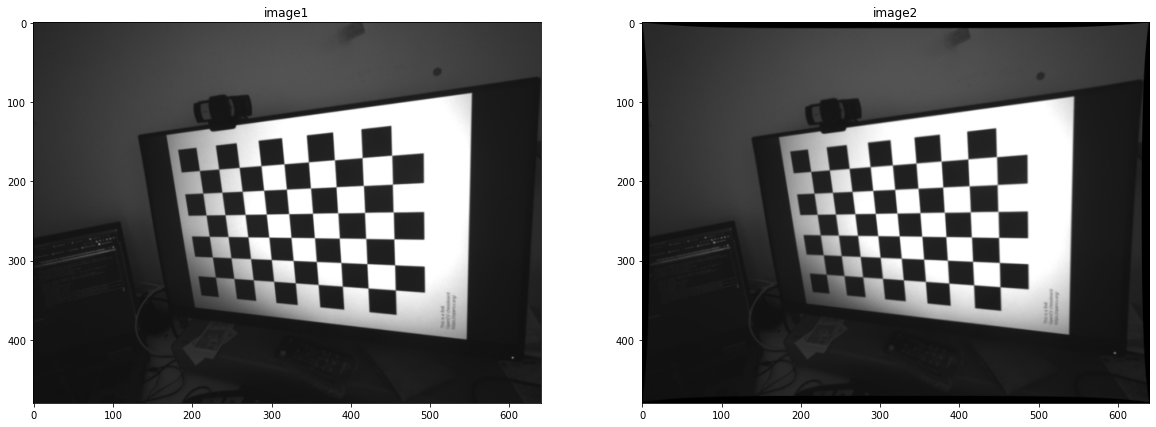

In [10]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(20,20))
img1_reverse = cv.cvtColor(img, cv.COLOR_BGR2RGB)

axs[0].imshow(img1_reverse)
axs[0].set_title('image1')

axs[1].imshow(dst)
axs[1].set_title('image2')

plt.show()